# Made with ML

- https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/madewithml.ipynb
- https://madewithml.com/

In [1]:
# import os
# import sys
# import time
# import numpy as np
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# from scipy import stats
# import warnings; warnings.filterwarnings('ignore')
# #plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
# %matplotlib inline

# 2. Data
## 2.1 Preparation

### Intuition

먼저 소스에서 데이터를 수집하고 학습, 유효성 검사 및 테스트 데이터 분할로 분할하여 데이터를 준비하는 것부터 시작하겠습니다.

#### Ingestion

In [2]:
import pandas as pd

In [3]:
# Data ingestion
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)

In [4]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


#### Splitting

다음으로, 훈련 데이터 세트를 훈련 데이터 분할과 값 데이터 분할로 분할해야 합니다.

1. 훈련 분할을 사용하여 모델을 훈련합니다.
    - 여기서 모델은 내부 가중치를 최적화하기 위해 입력(기능)과 출력(레이블) 모두에 액세스할 수 있습니다.

2. 훈련 분할을 통한 각 반복(에포크) 후에는 값 분할을 사용하여 모델의 성능을 결정합니다.
    - 여기서 모델은 가중치를 최적화하는 데 레이블을 사용하지 않고 대신 검증 성능을 사용하여 학습 속도 등과 같은 학습 하이퍼파라미터를 최적화합니다.

3. 마지막으로, 별도의 홀드아웃 테스트 데이터 세트를 사용하여 훈련 후 모델의 성능을 확인합니다.
    - 이는 훈련 데이터 세트와 유사한 분포의 새로운 데이터에서 모델이 어떻게 작동할 수 있는지에 대한 가장 좋은 척도입니다.

이 애플리케이션의 경우, 훈련 데이터 세트를 훈련 및 val 분할로 분할하고 테스트 세트를 위한 별도의 테스트 데이터 세트를 갖게 됩니다.  
하나의 큰 데이터 세트를 가지고 이를 세 개의 분할로 분할할 수도 있지만, 별도의 테스트 데이터 세트를 갖는 것이 좋습니다.  
시간이 지남에 따라 학습 데이터가 증가하여 테스트 분할이 매번 다르게 보일 수 있습니다. 이렇게 되면 모델을 다른 모델과 비교하거나 서로 비교하기가 어려워집니다.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [7]:
df.dtypes

id              int64
created_on     object
title          object
description    object
tag            object
dtype: object

In [8]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

다중 클래스 작업(각 프로젝트에 정확히 하나의 태그가 있는 경우)의 경우, 데이터 분할이 유사한 클래스 분포를 갖도록 하고 싶습니다. 이를 위해서는 sklearn의 train_test_split() 함수와 함께 stratify 키워드 인수를 사용하여 분할을 계층화하는 방법을 지정하면 됩니다.

In [9]:
# Split dataset
test_size = 0.2
train_df, val_df = train_test_split(
    df, 
    stratify=df.tag, 
    test_size=test_size, 
    random_state=1234
    )

In [10]:
train_df.tag.value_counts()

tag
natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: count, dtype: int64

유효성 검사 분할의 클래스 수를 보기 전에, 유효성 검사 분할은 전체 데이터 세트의 test_size에 불과하다는 점을 기억하세요.  
따라서 훈련 분할의 클래스 수와 비교할 수 있도록 값 수를 조정해야 합니다.

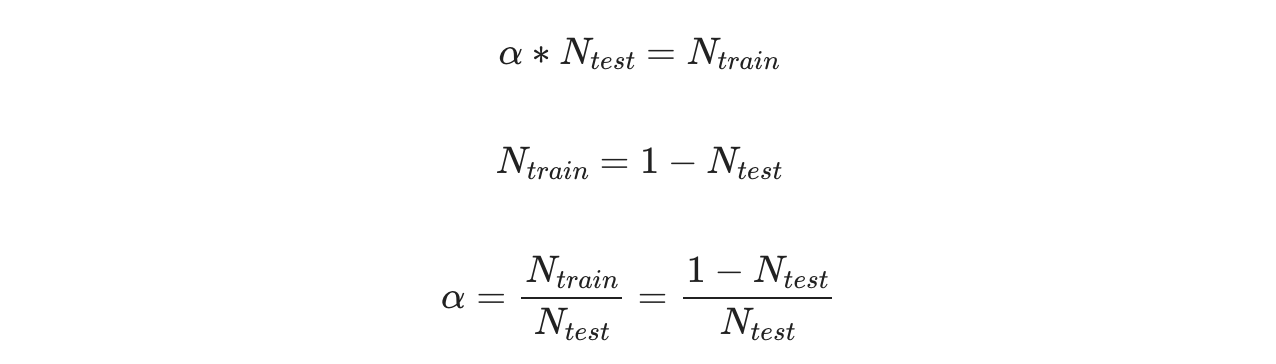

In [11]:
# Validation (adjusted) value counts
val_df.tag.value_counts() * int((1-test_size) / test_size)

tag
natural-language-processing    248
computer-vision                228
other                           84
mlops                           52
Name: count, dtype: int64

- 학습데이터와 유사한 것을 알수있다.

## 2.2 Exploration: EDA

### Intuition

데이터 세트의 신호와 뉘앙스를 이해하기 위한 탐색적 데이터 분석(EDA).  
이는 문제가 얼마나 잘 정의되었는지에 따라 개발 프로세스의 다양한 시점(라벨링 전/후, 전처리 등)에서 수행할 수 있는 순환적인 프로세스입니다.  
예를 들어, 데이터에 라벨을 붙이거나 전처리하는 방법을 잘 모르겠다면 EDA를 사용하여 문제를 해결할 수 있습니다.

우리는 종종 잘못 이해되는 중요하고도 재미있는 프로세스인 EDA로 프로젝트를 시작하려고 합니다.  
EDA에 대해 생각하는 방법은 다음과 같습니다:

- 단순히 정해진 플롯 세트(상관관계 매트릭스 등)를 시각화하는 것이 아닙니다.
- 목표는 가지고 있는 데이터가 작업에 충분하다는 것을 스스로 확신하는 것입니다.
- 중요한 질문에 답하고 인사이트를 더 쉽게 추출하기 위해 EDA를 사용합니다.
- 일회성 프로세스가 아니라 데이터가 증가함에 따라 분포 변화, 이상 징후 등을 포착하기 위해 EDA를 다시 방문해야 합니다.   

EDA를 사용하여 몇 가지 주요 질문에 답해 보겠습니다.

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn  as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [13]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


### target distribution

태그수 찾기

In [14]:
all_tags = Counter(df.tag)
all_tags

Counter({'natural-language-processing': 310,
         'computer-vision': 285,
         'other': 106,
         'mlops': 63})

In [15]:
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

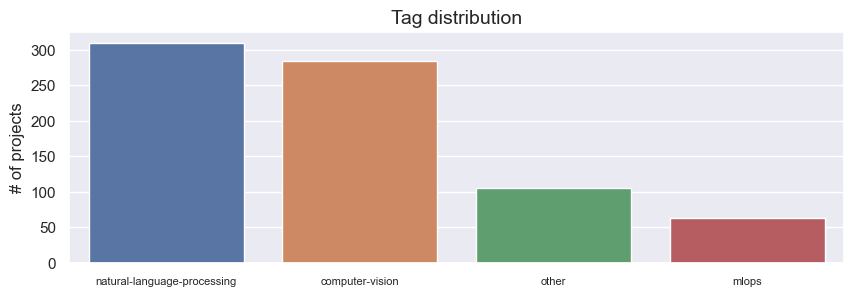

In [16]:
# Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

약간의 데이터 불균형이 있지만 그리 나쁘지는 않습니다.  
이 문제를 해결하기 위해 사용 빈도가 낮은 클래스는 오버 샘플링하고 인기 있는 클래스는 언더 샘플링하거나 손실 함수에 클래스 가중치를 적용하는 등 다양한 전략이 있습니다.

### Wordcloud

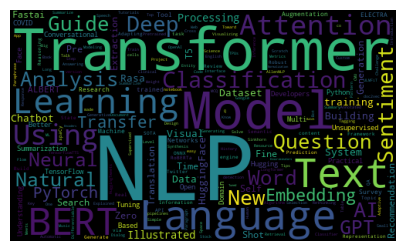

In [17]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

제목 텍스트 기능에 각 클래스에 대한 좋은 신호가 있고 우리의 직관과 일치하는 것 같습니다.  
설명 텍스트 기능에 대해서도 이 과정을 반복하면 비슷한 품질의 신호를 확인할 수 있습니다.  
이 정보는 모델링에 기능을 어떻게 사용할지 결정할 때 유용할 것입니다.

더 많은 탐색적 데이터 분석을 할 수 있지만 지금은 클래스 분포와 텍스트 기능의 품질에 대한 질문에 대한 답을 얻었습니다.  
다음 단원에서는 모델 학습을 준비하기 위해 데이터 집합을 전처리하겠습니다.

## 2.3 Preprocessing

### Intuition

데이터 전처리는 preparation과 transformation이라는 두 가지 유형의 프로세스로 분류할 수 있습니다.  
일반적인 전처리 기법을 살펴본 다음 데이터 집합을 전처리해 보겠습니다.

어떤 전처리 단계는 글로벌(데이터 세트에 의존하지 않음, 예: 소문자 텍스트, 마침표 제거 등)이고 어떤 전처리 단계는 로컬(어휘, 표준화 등 학습 분할에서만 학습됨, 예: 구조체만 학습됨)입니다.  
데이터 세트에 따라 달라지는 로컬 전처리 단계의 경우, 데이터 유출을 방지하기 위해 전처리 전에 먼저 데이터를 분할해야 합니다.

### Preparing

#### joins

기존 데이터 테이블에 SQL 조인을 수행하여 필요한 모든 관련 데이터를 하나의 뷰로 정리할 수 있습니다.  
이렇게 하면 데이터 집합으로 훨씬 쉽게 작업할 수 있습니다.

```
SELECT * FROM A
INNTER JOIN B on A.id == B.id
```

데이터 유출을 방지하기 위해 특정 시점의 유효한 조인을 수행하도록 주의해야 합니다.  
예를 들어, 추론이 필요한 시점에 사용할 수 없었던 테이블 A의 개체에 대한 기능이 테이블 B에 있을 수 있습니다.

#### Missing values

먼저, 누락된 값이 있는 행을 식별해야 하며, 식별한 후에는 이를 처리하는 몇 가지 접근 방식이 있습니다.

- 누락된 값이 있는 샘플 생략(작은 하위 집합만 누락된 경우)   

```python
# Drop a row (sample) by index
df.drop([4, 10, ...])
# Conditionally drop rows (samples)
df = df[df.value > 0]
# Drop samples with any missing feature
df = df[df.isnull().any(axis=1)]
```

- omit the entire feature (if too many samples are missing the value)   
```python
# Drop a column (feature)
df.drop(["A"], axis=1)
```

- fill in missing values for features (using domain knowledge, heuristics, etc.)   

```python
# Fill in missing values with mean
df.A = df.A.fillna(df.A.mean())
```

- may not always seem "missing" (ex. 0, null, NA, etc.)

```python
# Replace zeros to NaNs
import numpy as np
df.A = df.A.replace({"0": np.nan, 0: np.nan})
```

#### Outliers (anomalies)

- craft assumptions about what is a "normal" expected value

```python
# Ex. Feature value must be within 2 standard deviations
df[np.abs(df.A - df.A.mean()) <= (2 * df.A.std())]
```

- 중요한 이상값(예: 사기)이 제거되지 않도록 주의해야 합니다.
- 변환을 적용할 때 값이 이상값이 아닐 수 있습니다(예: 거듭제곱법).
- 이상값은 전역(포인트), 컨텍스트(조건부) 또는 집합(개별 포인트는 이상값이 아니며 집합 그룹이 이상값임) 일 수 있습니다.

#### Feature engineering

피처 엔지니어링은 고유한 방식으로 피처를 결합하여 신호를 추출하는 작업입니다.

```python
# Input
df.C = df.A + df.B
```

피처 엔지니어링은 어떤 피처를 엔지니어링하고 사용할지 안내해 줄 도메인 전문가와 협력하여 수행할 수 있습니다.

#### Cleaning

데이터 정리에는 모델이 데이터에서 신호를 더 쉽게 추출할 수 있도록 제약 조건을 적용하는 작업이 포함됩니다.

- 도메인 전문 지식과 EDA 사용
- 필터를 통한 제약 조건 적용
- 데이터 유형 일관성 보장
- 특정 열 값이 있거나 null인 데이터 포인트 제거
- 이미지(자르기, 크기 조정, 자르기 등)

```python
# Resize
import cv2
dims = (height, width)
resized_img = cv2.resize(src=img, dsize=dims, interpolation=cv2.INTER_LINEAR)
```

- 텍스트(소문자, 어간, 문자화, 정규식 등)

```python
# Lower case the text
text = text.lower()
```

### Transformations
Transforming the data involves feature encoding and engineering.

#### Scaling

- 입력의 규모가 프로세스에 영향을 미치는 모델에 필요합니다.
- 학습 분할에서 구조를 학습하고 다른 분할(로컬)에 적용합니다.
- 피처(예: 범주형 피처)에 맹목적으로 스케일링하지 않기

- 표준화: 값을 평균 0, 표준 1로 재조정합니다.

In [18]:
# Standardization
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:\n", x)
print (f"mean: {np.mean(x):.2f}, std: {np.std(x):.2f}")
x_standardized = (x - np.mean(x)) / np.std(x)
print ("x_standardized:\n", x_standardized)
print (f"mean: {np.mean(x_standardized):.2f}, std: {np.std(x_standardized):.2f}")

x:
 [0.39385835 0.4234635  0.4424248  0.1796162 ]
mean: 0.36, std: 0.11
x_standardized:
 [ 0.32249613  0.60316083  0.78291886 -1.70857582]
mean: 0.00, std: 1.00


- min-max: rescale values between a min and max

In [19]:
# Min-max
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
print (f"min: {x.min():.2f}, max: {x.max():.2f}")
x_scaled = (x - x.min()) / (x.max() - x.min())
print ("x_scaled:", x_scaled)
print (f"min: {x_scaled.min():.2f}, max: {x_scaled.max():.2f}")

x: [0.28421205 0.74232809 0.31319177 0.96318994]
min: 0.28, max: 0.96
x_scaled: [0.         0.67471423 0.0426814  1.        ]
min: 0.00, max: 1.00


- binning: convert a continuous feature into categorical using bins

In [20]:
# Binning
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
bins = np.linspace(0, 1, 5) # bins between 0 and 1
print ("bins:", bins)
binned = np.digitize(x, bins)
print ("binned:", binned)

x: [0.80771249 0.47106723 0.74615848 0.14318197]
bins: [0.   0.25 0.5  0.75 1.  ]
binned: [4 2 3 1]


#### Encoding

- 데이터를 효율적이고(신호 유지) 효과적으로(패턴 학습, 예: 원핫 대 임베딩) 표현할 수 있습니다.
- 레이블 인코딩 : 범주형 값에 대한 고유 인덱스
- 원핫 인코딩 : 바이너리 벡터로 표현
- 임베딩 : 맥락을 표현하기 위한 representation

```python
# Embeddings
self.embeddings = nn.Embedding(
    embedding_dim=embedding_dim, num_embeddings=vocab_size)
x_in = self.embeddings(x_in)
print (x_in.shape)
```
```python
# 결과
(len(X), embedding_dim)
```

#### Extraction
- signal extraction from existing features
- combine existing features
- transfer learning: using a pretrained model as a feature extractor and finetuning on it's results
- autoencoders: learn to encode inputs for compressed knowledge representation

- principle component analysis (PCA): linear dimensionality reduction to project data in a lower dimensional space.

In [21]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1, 3], [-2, -1, 2], [-3, -2, 1]])
pca = PCA(n_components=2)
pca.fit(X)
print (pca.transform(X))
print (pca.explained_variance_ratio_)
print (pca.singular_values_)

[[-1.44245791 -0.1744313 ]
 [-0.1148688   0.31291575]
 [ 1.55732672 -0.13848446]]
[0.96838847 0.03161153]
[2.12582835 0.38408396]


- counts(ngram): 토큰 개수의 행렬로 텍스트를 희소하게 표현 - 특징 값에 의미 있고 분리 가능한 신호가 많은 경우 유용합니다.

In [22]:
# Counts (ngram)
from sklearn.feature_extraction.text import CountVectorizer
y = [
    "acetyl acetone",
    "acetyl chloride",
    "chloride hydroxide",
]
vectorizer = CountVectorizer()
y = vectorizer.fit_transform(y)
print (vectorizer.get_feature_names_out())
print (y.toarray())
# 💡 Repeat above with char-level ngram vectorizer
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3)) # uni, bi and trigrams

['acetone' 'acetyl' 'chloride' 'hydroxide']
[[1 1 0 0]
 [0 1 1 0]
 [0 0 1 1]]


- similarity: similar to count vectorization but based on similarities in tokens

- and many more!

시간이 지남에 따라 엔티티(사용자, 항목 등)에 대한 피처 값을 검색하고 여러 프로젝트에서 동일한 피처를 재사용해야 하는 경우가 종종 있습니다.   
적절한 피처 값을 검색하고 노력의 중복을 피하기 위해 피처 스토어를 사용할 수 있습니다.

### Implementation

우리의 애플리케이션의 경우, 데이터 세트와 관련된 몇 가지 전처리 단계를 구현할 것입니다.

In [23]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

#### Feature engineering

In [24]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


기존 입력 피처를 결합하여 모델의 학습을 돕는 의미 있는 신호를 새로 만들 수 있습니다.  
그러나 일반적으로 다양한 조합을 경험적으로 실험해 보지 않고는 특정 피처 조합이 도움이 되는지 아닌지 알 수 있는 방법은 없습니다.  
여기서는 프로젝트의 제목과 설명을 개별적으로 피처로 사용할 수 있지만 이를 결합하여 하나의 입력 피처를 만들겠습니다.

In [25]:
# input
df["text"] = df.title + " " + df.description

In [26]:
df.head()

,id,created_on,title,description,tag,text
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision,Comparison between YOLO and RCNN on real world...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision,"Show, Infer & Tell: Contextual Inference for C..."
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other,Awesome Graph Classification A collection of i...
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other,Awesome Monte Carlo Tree Search A curated list...
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other,"AttentionWalk A PyTorch Implementation of ""Wat..."


#### Cleaning

텍스트 데이터를 다루기 때문에 몇 가지 일반적인 텍스트 전처리 작업을 적용할 수 있습니다.  
여기서는 파이썬의 기본 제공 정규식 라이브러리인 re와 자연어 툴킷인 nltk를 사용하겠습니다.

In [27]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sguys99/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def clean_text(text, stopwords=STOPWORDS):
    """Clean raw text string."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text

이모티콘, 구두점 등은 작업에 많은 신호를 전달하기 때문에 당연히 포함시킬 수 있지만,  
가장 영향력이 크다고 생각되는 기능으로 초기 피처 세트를 단순화한 다음 다른 피처를 천천히 도입하고 유용성을 평가하는 것이 가장 좋습니다.

함수를 정의하고 나면 pandas.DataFrame.apply를 통해 데이터 프레임의 각 행에 함수를 적용할 수 있습니다.

In [29]:
# Apply to dataframe
original_df = df.copy()
df.text = df.text.apply(clean_text)
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes


더 많은 데이터를 수집할 수 있을 때까지 특징값 차원 문제를 완화할 수 있도록 빈도가 낮아지는 특징을 도입하거나 현명한 방법(예: binning, extract general attributes, common n-grams, mean encoding using other feature values, 등)으로 인코딩하여 특징값 차원 문제를 완화하는 것이 좋습니다.

열(pandas.DataFrame.drop)과 null 태그 값이 있는 행(pandas.DataFrame.dropna)을 제거하여 정리 작업을 마무리하겠습니다.

In [30]:
# DataFrame cleanup
df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # drop cols
df = df.dropna(subset=["tag"])  # drop nulls
df = df[["text", "tag"]]  # rearrange cols
df.head()

,text,tag
0,comparison yolo rcnn real world videos bringin...,computer-vision
1,show infer tell contextual inference creative ...,computer-vision
2,awesome graph classification collection import...,other
3,awesome monte carlo tree search curated list m...,other
4,attentionwalk pytorch implementation watch ste...,other


#### Encoding

모델이 데이터를 처리할 수 있도록 데이터를 숫자 값으로 인코딩해야 합니다. 텍스트 레이블을 고유한 인덱스로 인코딩하는 것부터 시작하겠습니다.

In [31]:
train_df.head()

,id,created_on,title,description,tag
637,2047,2020-08-05 15:18:46,Test-Time Data Augmentation,Tutorial on how to properly implement test-tim...,mlops
730,2351,2020-09-22 03:42:58,Simple Transformers: Transformers Made Easy,Simple Transformers removes complexity and let...,natural-language-processing
276,900,2020-05-17 08:14:24,A Visual Survey of Data Augmentation in NLP,An extensive overview of text data augmentatio...,natural-language-processing
275,894,2020-05-17 04:47:40,"A Large-Scale, Open-Domain, Mixed-Interface Di...","Korbit, a large-scale, open-domain, mixed-inte...",natural-language-processing
622,2020,2020-08-01 12:14:26,Text Summarization using TF-IDF Algorithm,This Article explains the TF-IDF algorithm and...,natural-language-processing


In [32]:
# Label to index
tags = train_df.tag.unique().tolist()
num_classes = len(tags)
class_to_index = {tag: i for i, tag in enumerate(tags)}
class_to_index

{'mlops': 0,
 'natural-language-processing': 1,
 'computer-vision': 2,
 'other': 3}

Next, we can use the pandas.Series.map function to map our class_to_index dictionary on our tag column to encode our labels.

In [33]:
# Encode labels
df["tag"] = df["tag"].map(class_to_index)
df.head()

,text,tag
0,comparison yolo rcnn real world videos bringin...,2
1,show infer tell contextual inference creative ...,2
2,awesome graph classification collection import...,3
3,awesome monte carlo tree search curated list m...,3
4,attentionwalk pytorch implementation watch ste...,3


또한 예측을 다시 텍스트 레이블로 디코딩할 수 있어야 합니다.  
index_to_class 사전을 생성하고 이를 사용하여 인코딩된 레이블을 다시 텍스트 레이블로 변환하면 됩니다.

In [34]:
def decode(indices, index_to_class):
    return [index_to_class[index] for index in indices]

In [35]:
index_to_class = {v:k for k, v in class_to_index.items()}
decode(df.head()["tag"].values, index_to_class=index_to_class)

['computer-vision', 'computer-vision', 'other', 'other', 'other']

#### Tokenizer

다음으로 텍스트도 인코딩하겠습니다.  
랜덤 딕셔너리를 사용하는 대신 사전 학습된 LLM(scibert)에 사용된 토큰화 도구를 사용하여 텍스트를 토큰화합니다.  
나중에 모델을 훈련할 때 이 정확한 모델을 미세 조정할 것입니다.

In [36]:
import numpy as np
from transformers import BertTokenizer

토크나이저는는 입력 텍스트를 토큰 ID 리스트와 어텐션 마스크 리스트로 변환합니다.  
토큰 ID는 어휘에 포함된 토큰의 인덱스입니다. 어텐션 마스크는 모델이 토큰 인덱스에 집중할 수 있도록 토큰 인덱스의 위치를 나타내는 바이너리 마스크입니다(패드 토큰은 무시).

In [37]:
# Bert tokenizer
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
text = "Transfer learning with transformers for text classification."
encoded_inputs = tokenizer([text], return_tensors="np", padding="longest")  # pad to longest item in batch
print ("input_ids:", encoded_inputs["input_ids"])
print ("attention_mask:", encoded_inputs["attention_mask"])
print (tokenizer.decode(encoded_inputs["input_ids"][0]))

input_ids: [[  102  2268  1904   190 29155   168  3267  2998   205   103]]
attention_mask: [[1 1 1 1 1 1 1 1 1 1]]
[CLS] transfer learning with transformers for text classification. [SEP]


토큰나이저 함수에서 padding="longest"를 사용하여 배치에서 가장 긴 항목으로 입력을 패딩한다는 점에 유의하세요.  
이는 나중에 입력 배치를 사용하면서 균일한 입력 크기를 만들고자 할 때 중요해지며,  
짧은 텍스트 시퀀스는 배치에서 가장 긴 입력의 길이에 맞게 0으로 패딩됩니다.

토큰화를 tokenize 함수로 래핑하여 데이터 배치를 토큰화하는 데 사용할 수 있습니다.

In [38]:
def tokenize(batch):
    tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
    encoded_inputs = tokenizer(batch["text"].tolist(), return_tensors="np", padding="longest")
    return dict(ids=encoded_inputs["input_ids"], masks=encoded_inputs["attention_mask"], targets=np.array(batch["tag"]))

In [39]:
# Tokenization
tokenize(df.head(1))

{'ids': array([[  102,  2029,  1778,   609,  6446,  4857,  1332,  2399, 13572,
         19125,  1983,  1954,  6240,  3717,  7434,  1262,   537,   201,
          1040,   545,  4714,   103]]),
 'masks': array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'targets': array([2])}

#### Best prectice  

모든 전처리 작업을 조합함

In [40]:
def preprocess(df, class_to_index):
    """Preprocess the data."""
    df["text"] = df.title + " " + df.description  # feature engineering
    df["text"] = df.text.apply(clean_text)  # clean text
    df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # clean dataframe
    df = df[["text", "tag"]]  # rearrange columns
    df["tag"] = df["tag"].map(class_to_index)  # label encoding
    outputs = tokenize(df)
    return outputs

In [41]:
# Apply
preprocess(df = train_df, class_to_index=class_to_index)

{'ids': array([[  102,   856,   532, ...,     0,     0,     0],
        [  102,  2177, 29155, ...,     0,     0,     0],
        [  102,  2180,  3241, ...,     0,     0,     0],
        ...,
        [  102,   453,  2068, ...,  5730,   432,   103],
        [  102, 11268,  1782, ...,     0,     0,     0],
        [  102,  1596,   122, ...,     0,     0,     0]]),
 'masks': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 'targets': array([0, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1,
        1, 1, 1, 1, 2, 1, 2, 0, 3, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 3, 3,
        3, 0, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 1, 1, 3, 1, 0,
        1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 1,
        1, 1, 3, 3, 0, 2, 3, 2, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 0, 0, 2,
        1, 1, 2, 2, 1, 1, 0, 3, 1

## 2.4 Distributed Data Processing

### Intuition

지금까지는 단일 머신에서 데이터 처리 작업을 수행했습니다.  
우리의 데이터 세트는 단일 판다스 데이터프레임에 들어갈 수 있었고, 단일 파이썬 프로세스에서 작업을 수행할 수 있었습니다.  
하지만 데이터 세트가 너무 커서 단일 머신에 들어갈 수 없다면 어떨까요?  
데이터 처리 작업을 여러 머신에 분산시켜야 할 것입니다.  
더 큰 비정형 데이터 세트와 더 큰 모델(LLM)을 위한 ML이 증가하는 추세에 따라, 단일 머신의 제약을 빠르게 뛰어넘을 수 있으며 분산화가 필요할 것입니다.

### Implementation

분산 컴퓨팅을 위한 프레임워크에는 Ray, Dask, Modin, Spark 등과 같은 많은 프레임워크가 있습니다.  
이들 모두 훌륭한 옵션이지만, 저희 애플리케이션의 경우 기존 코드를 최소한으로 변경하면서 데이터 처리 작업을 확장할 수 있는 프레임워크를 선택하고 싶고, 이 모든 것이 Python에서 이루어집니다.  
또한 다운스트림 워크로드(교육, 튜닝, 서비스 등)를 분산시키고자 할 때 잘 통합되는 프레임워크를 선택하고자 합니다.

이러한 요구 사항을 해결하기 위해 Python 애플리케이션을 쉽게 확장할 수 있는 분산 컴퓨팅 프레임워크인 Ray를 사용할 것입니다.  
다양한 애플리케이션에 사용할 수 있는 범용 프레임워크이지만, 우선은 데이터 처리 작업에 사용하고 나중에 더 많은 작업을 수행할 예정입니다.  
또한 앞서 언급한 분산 데이터 처리 프레임워크(Dask, Modin, Spark)와도 훌륭하게 통합됩니다.

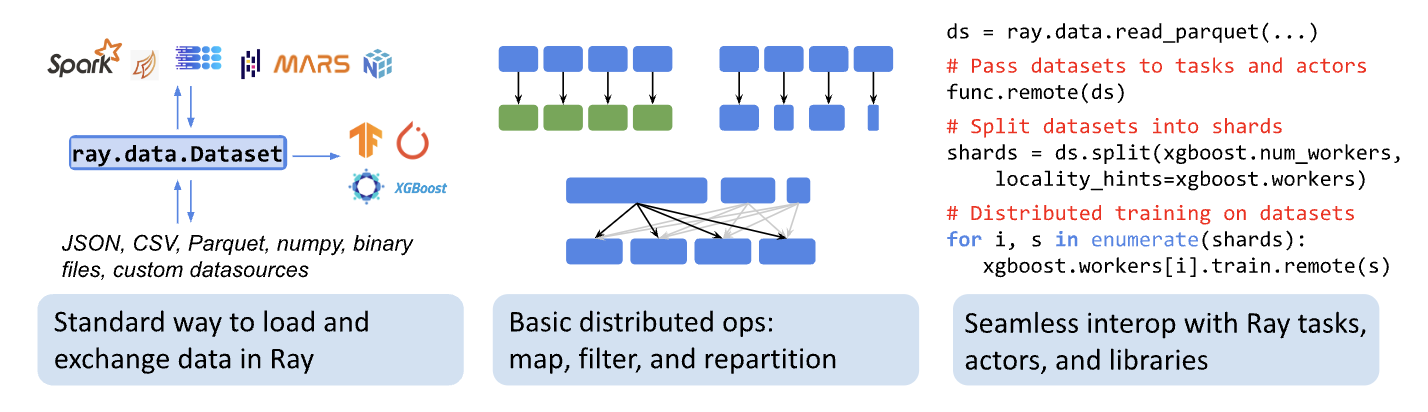

#### Setup

우리가 해야 할 유일한 설정은 데이터에 작업할 때 순서를 유지하도록 Ray를 설정하는 것입니다. 이는 재현 가능하고 결정론적인 결과를 보장하는 데 중요합니다.

In [42]:
import os
import ray

In [43]:
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")
from dotenv import load_dotenv; load_dotenv()
%load_ext autoreload
%autoreload 2

In [44]:
# Initialize Ray
if ray.is_initialized():
    ray.shutdown()
ray.init()

2023-12-14 09:19:55,815	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.11
Ray version:,2.7.0
Dashboard:,http://127.0.0.1:8265


In [45]:
ray.cluster_resources()

{'memory': 40114320180.0,
 'object_store_memory': 2147483648.0,
 'node:127.0.0.1': 1.0,
 'CPU': 10.0,
 'node:__internal_head__': 1.0}

In [46]:
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
# df = pd.read_csv(DATASET_LOC)
# df.head()

#### Ingestion

먼저 데이터 세트를 수집하는 것부터 시작하겠습니다.   
Ray에는 모든 주요 데이터 형식과 소스를 지원하는 다양한 입력/출력 함수가 있습니다.

In [47]:
# Data ingestion
ds = ray.data.read_csv(DATASET_LOC)
ds = ds.random_shuffle(seed = 1234)

2023-12-14 09:19:57,161	INFO read_api.py:406 -- To satisfy the requested parallelism of 20, each read task output is split into 20 smaller blocks.


In [48]:
ds

RandomShuffle
+- Dataset(
      num_blocks=20,
      num_rows=764,
      schema={
         id: int64,
         created_on: timestamp[s],
         title: string,
         description: string,
         tag: string
      }
   )

In [49]:
ds.take(1)

2023-12-14 09:19:58,092	INFO dataset.py:2380 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2023-12-14 09:19:58,094	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> LimitOperator[limit=1]
2023-12-14 09:19:58,095	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:19:58,095	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

[{'id': 549,
  'created_on': datetime.datetime(2020, 4, 16, 3, 48, 35),
  'title': '15 Best Tools for Tracking Machine Learning Experiments',
  'description': 'A feature comparison of all the open-source and commercial options for experiment tracking.',
  'tag': 'mlops'}]

#### Splitting

다음으로, 데이터 세트를 훈련 및 검증 분할로 분할하겠습니다. Ray에는 train_test_split 함수가 내장되어 있지만, 태그 열을 기준으로 분할을 계층화할 수 있도록 수정된 버전을 사용하고 있습니다.

In [50]:
import sys
sys.path.append("..")

In [51]:
#from madewithml.data import stratify_split

In [52]:
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import ray
from ray.data import Dataset

def stratify_split(
    ds: Dataset,
    stratify: str,
    test_size: float,
    shuffle: bool = True,
    seed: int = 1234,
) -> Tuple[Dataset, Dataset]:
    """Split a dataset into train and test splits with equal
    amounts of data points from each class in the column we
    want to stratify on.

    Args:
        ds (Dataset): Input dataset to split.
        stratify (str): Name of column to split on.
        test_size (float): Proportion of dataset to split for test set.
        shuffle (bool, optional): whether to shuffle the dataset. Defaults to True.
        seed (int, optional): seed for shuffling. Defaults to 1234.

    Returns:
        Tuple[Dataset, Dataset]: the stratified train and test datasets.
    """

    def _add_split(df: pd.DataFrame) -> pd.DataFrame:  # pragma: no cover, used in parent function
        """Naively split a dataframe into train and test splits.
        Add a column specifying whether it's the train or test split."""
        train, test = train_test_split(df, test_size=test_size, shuffle=shuffle, random_state=seed)
        train["_split"] = "train"
        test["_split"] = "test"
        return pd.concat([train, test])

    def _filter_split(df: pd.DataFrame, split: str) -> pd.DataFrame:  # pragma: no cover, used in parent function
        """Filter by data points that match the split column's value
        and return the dataframe with the _split column dropped."""
        return df[df["_split"] == split].drop("_split", axis=1)

    # Train, test split with stratify
    grouped = ds.groupby(stratify).map_groups(_add_split, batch_format="pandas")  # group by each unique value in the column we want to stratify on
    train_ds = grouped.map_batches(_filter_split, fn_kwargs={"split": "train"}, batch_format="pandas")  # combine
    test_ds = grouped.map_batches(_filter_split, fn_kwargs={"split": "test"}, batch_format="pandas")  # combine

    # Shuffle each split (required)
    train_ds = train_ds.random_shuffle(seed=seed)
    test_ds = test_ds.random_shuffle(seed=seed)

    return train_ds, test_ds

In [53]:
# Split dataset
test_size = 0.2
train_ds, val_ds = stratify_split(ds, stratify="tag", test_size=test_size)

2023-12-14 09:19:59,064	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> LimitOperator[limit=1]
2023-12-14 09:19:59,065	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:19:59,065	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
train_ds.take(1)

2023-12-14 09:19:59,509	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> LimitOperator[limit=1]
2023-12-14 09:19:59,510	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:19:59,511	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/400 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/400 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/20 [00:00<?, ?it/s]

[{'id': 980,
  'created_on': Timestamp('2020-05-25 14:52:17'),
  'title': 'Super-BPD for Fast Image Segmentation',
  'description': 'We propose direction-based super-BPD, an alternative to superpixel, for fast generic image segmentation, achieving state-of-the-art real-time result.',
  'tag': 'computer-vision'}]

In [55]:
val_ds.take(1)

2023-12-14 09:20:00,472	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> LimitOperator[limit=1]
2023-12-14 09:20:00,473	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:20:00,473	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/400 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/400 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/20 [00:00<?, ?it/s]

[{'id': 1856,
  'created_on': Timestamp('2020-07-14 03:21:00'),
  'title': 'DeepDream Video Style Transfer',
  'description': 'DeepDream on Video',
  'tag': 'computer-vision'}]

#### Preprocessing

마지막으로 데이터 분할을 전처리할 준비가 되었습니다.  
Ray를 사용할 때의 장점 중 하나는 이전 단원에서 구현한 원래의 판다스 기반 전처리 함수를 변경할 필요가 없다는 것입니다.  
대신 Ray의 map_batches 유틸리티와 함께 직접 사용하여 분산된 방식으로 데이터의 배치에 전처리 함수를 매핑할 수 있습니다.

In [56]:
# def preprocess(df, class_to_index):
#     """Preprocess the data."""
#     df["text"] = df.title + " " + df.description  # feature engineering
#     df["text"] = df.text.apply(clean_text)  # clean text
#     df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # clean dataframe
#     df = df[["text", "tag"]]  # rearrange columns
#     df["tag"] = df["tag"].map(class_to_index)  # label encoding
#     outputs = tokenize(df)
#     return outputs

In [57]:
# Mapping
tags = train_ds.unique(column="tag")
class_to_index = {tag: i for i, tag in enumerate(tags)}

2023-12-14 09:20:01,195	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> LimitOperator[limit=1]
2023-12-14 09:20:01,195	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:20:01,196	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/400 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/400 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/20 [00:00<?, ?it/s]

2023-12-14 09:20:01,764	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> AllToAllOperator[Aggregate] -> TaskPoolMapOperator[MapBatches(<lambda>)]
2023-12-14 09:20:01,765	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:20:01,765	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/400 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/400 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/400 [00:00<?, ?it/s]

- Aggregate 11:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 12:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 13:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/400 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/20 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/20 [00:00<?, ?it/s]

In [58]:
# Distributed preprocessing
sample_ds = train_ds.map_batches(
  preprocess,
  fn_kwargs={"class_to_index": class_to_index},
  batch_format="pandas")

In [59]:
sample_ds

MapBatches(preprocess)
+- RandomShuffle
   +- MapBatches(_filter_split)
      +- MapBatches(group_fn)
         +- Sort
            +- RandomShuffle
               +- Dataset(
                     num_blocks=20,
                     num_rows=764,
                     schema={
                        id: int64,
                        created_on: timestamp[s],
                        title: string,
                        description: string,
                        tag: string
                     }
                  )

In [60]:
sample_ds.show(1)

2023-12-14 09:20:02,526	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(20)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> TaskPoolMapOperator[MapBatches(preprocess)] -> LimitOperator[limit=1]
2023-12-14 09:20:02,526	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-12-14 09:20:02,527	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/400 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/400 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/400 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/400 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/400 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/20 [00:00<?, ?it/s]

{'ids': array([  102, 15906, 30123,  6622,  4813,   869,  2059,  5437,  6773,
        6622,  4813, 19059,  5524,   123,  5437,  6773,  6985,   643,
        4371,   103,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0]), 'masks': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'targets': 0}
